import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Assume X contains all columns except 'PRICE', and y contains the target variable 'PRICE'
X = df.drop(columns=['PRICE'])
y = df['PRICE']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['REGION', 'BEDROOMS'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model (Optional)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Random Forest Feature Importances for "PRICE"')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [14]:
import pandas as pd

# Read the CSV file into a DataFrame

df = pd.read_csv('project step 1.csv')

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7018    False
7019    False
7020    False
7021    False
7022    False
Length: 7023, dtype: bool

In [17]:
df.isnull()

,WEIGHT,STATUS,FINALDEST,FOOTINGS,LEASE,LOCATION,REGION,PIERS,SECURED,TITLED,...,jprice,jsqft,jbedroom,jlease,jfinaldest,jtitle,jsecured,jlocation,jfootings,jpiers
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7019,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7021,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


       Feature  Importance
17      jprice    0.751744
10    SECTIONS    0.118382
11        SQFT    0.040751
15     CONTROL    0.027848
0       WEIGHT    0.010861
6       REGION    0.008873
14      WGTADJ    0.006582
5     LOCATION    0.005004
3     FOOTINGS    0.004103
12    BEDROOMS    0.003564
7        PIERS    0.003388
9       TITLED    0.003252
13   SHIPMONTH    0.002981
1       STATUS    0.002748
8      SECURED    0.002535
25   jfootings    0.001057
22      jtitle    0.001056
20      jlease    0.000874
21  jfinaldest    0.000831
26      jpiers    0.000693
23    jsecured    0.000686
24   jlocation    0.000583
18       jsqft    0.000568
19    jbedroom    0.000522
16     jstatus    0.000298
2    FINALDEST    0.000217
4        LEASE    0.000000


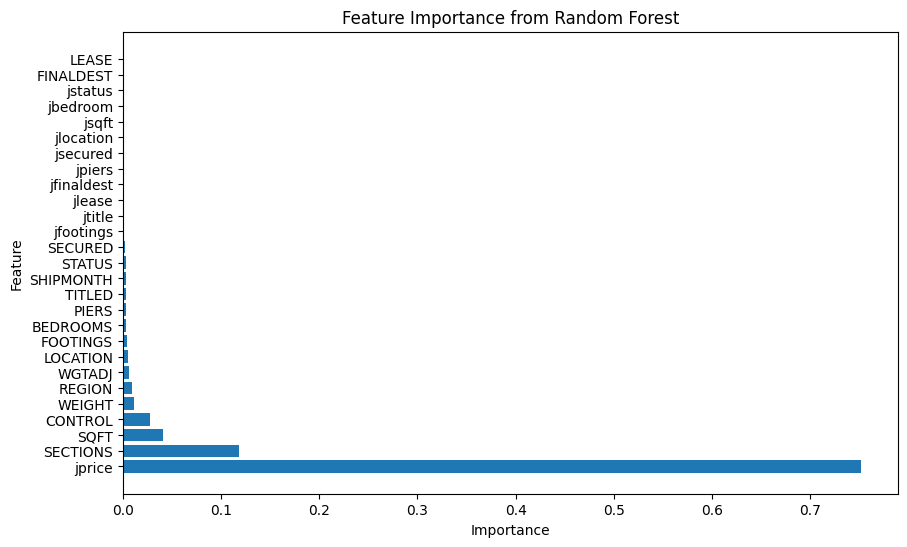

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your data
rf_model.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


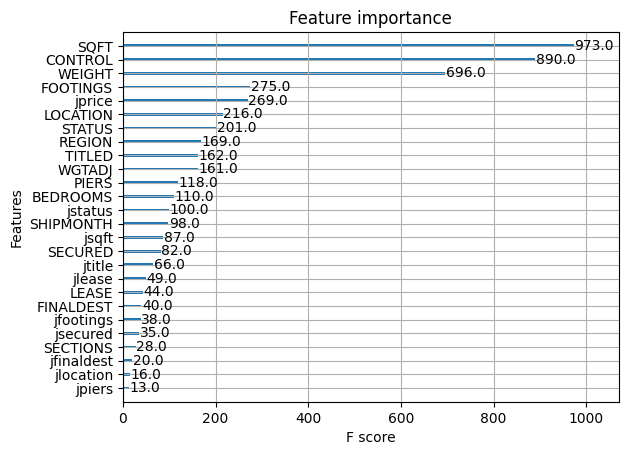

In [22]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Fit the model to your data
xgb_model.fit(X, y)

# Plot feature importance
plot_importance(xgb_model)
plt.show()


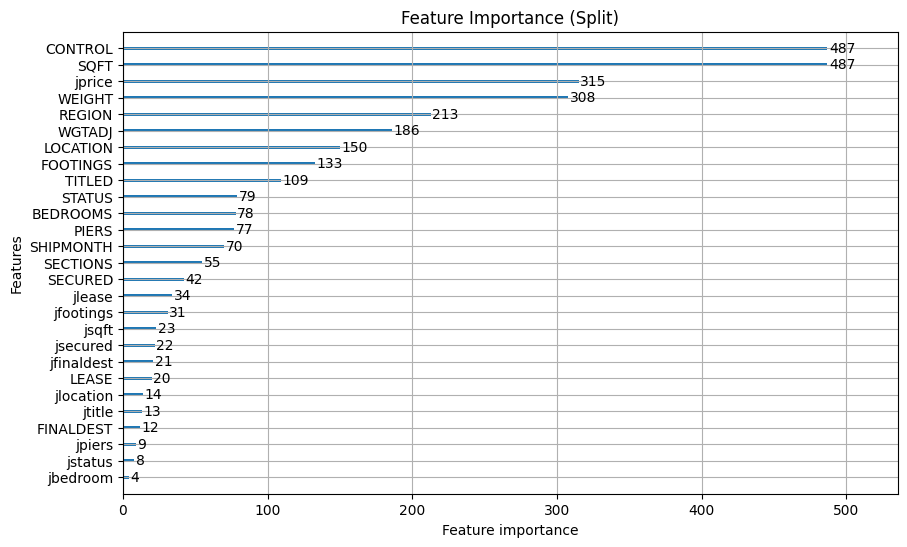

In [23]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Create a LightGBM dataset
lgb_dataset = lgb.Dataset(X, label=y)

# Specify parameters for the LightGBM model
params = {
    'objective': 'regression',  # Use 'regression' for regression problems
    'metric': 'rmse',  # Root Mean Squared Error for regression
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Percentage of features to consider for each round
    'bagging_fraction': 0.8,  # Percentage of data to randomly sample for each round
    'bagging_freq': 5,  # Frequency for bagging
    'verbose': 0  # Controls the level of LightGBM's verbosity
}

# Train the LightGBM model
lgb_model = lgb.train(params, lgb_dataset, num_boost_round=100)

# Plot feature importance
lgb.plot_importance(lgb_model, importance_type='split', figsize=(10, 6), title='Feature Importance (Split)')
plt.show()

# You can also plot based on 'gain' instead of 'split'
# lgb.plot_importance(lgb_model, importance_type='gain', figsize=(10, 6), title='Feature Importance (Gain)')
# plt.show()


       Feature   Coefficient
4        LEASE  47027.207263
2    FINALDEST -44828.482216
17      jprice -31485.207019
10    SECTIONS  24421.334395
14      WGTADJ -14165.493848
19    jbedroom   8451.533270
18       jsqft   8451.533270
22      jtitle   7210.025346
16     jstatus   7048.309526
25   jfootings   6761.371806
12    BEDROOMS  -5686.299354
6       REGION   5461.334008
13   SHIPMONTH  -5150.607754
7        PIERS   4228.898558
26      jpiers   4107.310597
24   jlocation  -3991.506530
1       STATUS  -3033.372866
3     FOOTINGS  -2894.127234
20      jlease  -2601.525258
9       TITLED   2447.029021
5     LOCATION  -1296.849890
21  jfinaldest   1190.663313
23    jsecured   -577.235168
8      SECURED   -388.574932
0       WEIGHT   -289.218389
11        SQFT     60.137381
15     CONTROL      0.535313


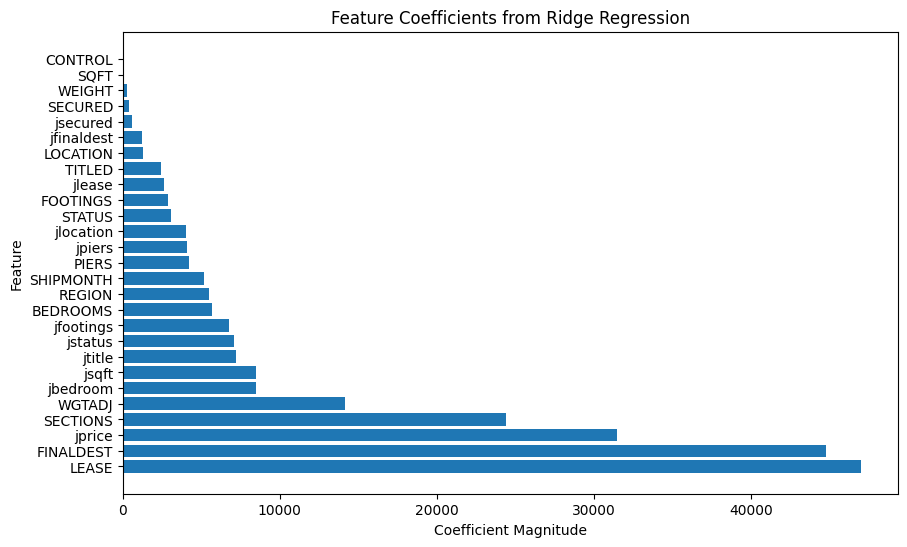

In [24]:
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model to your data
ridge_model.fit(X, y)

# Get the coefficients of the features
coefficients = ridge_model.coef_

# Create a DataFrame to display feature coefficients
feature_coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by coefficient magnitude
feature_coefficients_df = feature_coefficients_df.reindex(
    feature_coefficients_df['Coefficient'].abs().sort_values(ascending=False).index
)

# Display the feature coefficients
print(feature_coefficients_df)

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'].abs())
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Ridge Regression')
plt.show()


c:\Users\theam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.671e+12, tolerance: 4.144e+09
  model = cd_fast.enet_coordinate_descent(


       Feature   Coefficient
4        LEASE  4.361275e+04
2    FINALDEST -4.062591e+04
17      jprice -3.292169e+04
10    SECTIONS  2.492830e+04
18       jsqft  1.725754e+04
14      WGTADJ -1.444321e+04
16     jstatus  8.139772e+03
22      jtitle  7.305367e+03
25   jfootings  6.447136e+03
12    BEDROOMS -6.012941e+03
6       REGION  5.369068e+03
7        PIERS  4.220610e+03
26      jpiers  3.778329e+03
24   jlocation -3.634737e+03
1       STATUS -3.287024e+03
3     FOOTINGS -2.558653e+03
9       TITLED  2.086508e+03
20      jlease -1.308942e+03
5     LOCATION -1.169809e+03
8      SECURED -9.672383e+02
21  jfinaldest -5.548067e+02
0       WEIGHT -2.859322e+02
23    jsecured -2.736563e+02
13   SHIPMONTH  1.802995e+02
11        SQFT  6.042479e+01
15     CONTROL  1.930874e-03
19    jbedroom  2.960091e-10


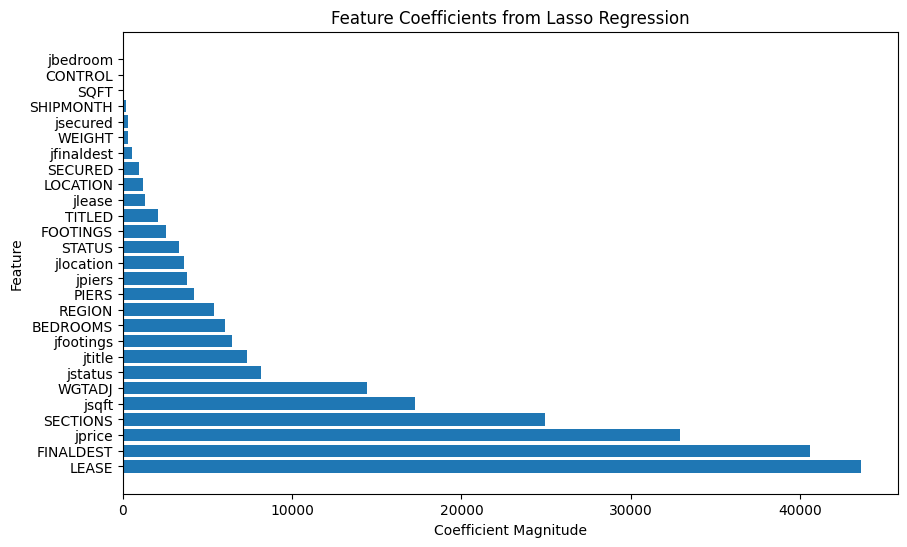

In [25]:
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Separate features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model to your data
lasso_model.fit(X, y)

# Get the coefficients of the features
coefficients = lasso_model.coef_

# Create a DataFrame to display feature coefficients
feature_coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by coefficient magnitude
feature_coefficients_df = feature_coefficients_df.reindex(
    feature_coefficients_df['Coefficient'].abs().sort_values(ascending=False).index
)

# Display the feature coefficients
print(feature_coefficients_df)

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'].abs())
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Lasso Regression')
plt.show()


DATA ANALYSIS

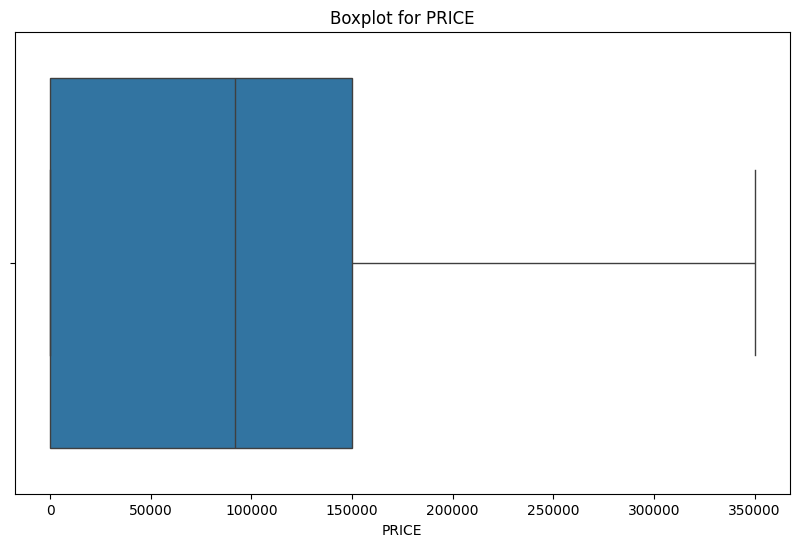

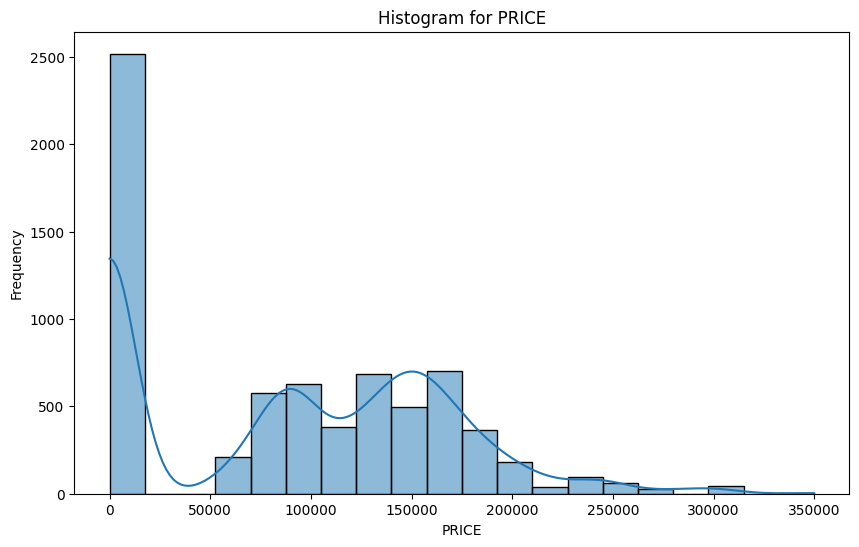

<Figure size 800x600 with 0 Axes>

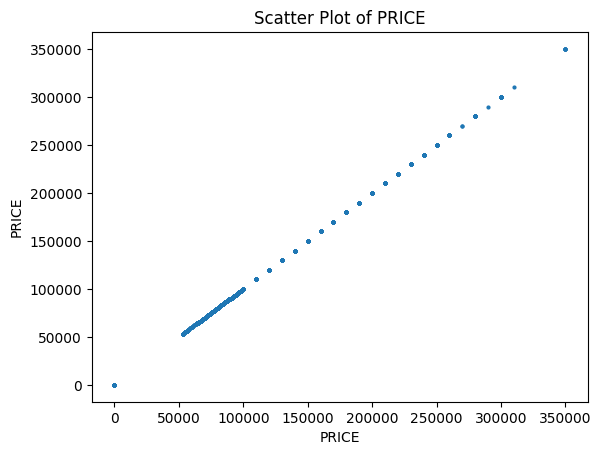

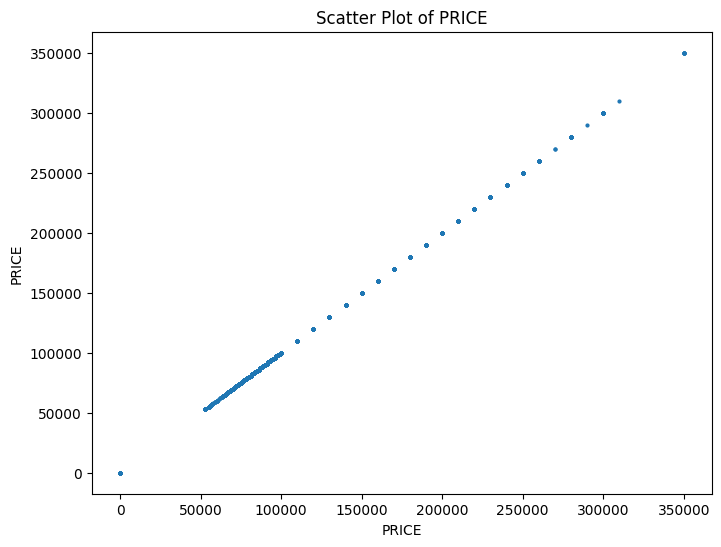

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Choose the column for visualization
selected_column = 'PRICE'

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[selected_column])
plt.title(f'Boxplot for {selected_column}')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[selected_column], bins=20, kde=True)
plt.title(f'Histogram for {selected_column}')
plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.show()


# Create the scatter plot with pandas
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
df.plot.scatter(x=selected_column, y=selected_column, s=4)  # Use the same column for both axes
plt.title('Scatter Plot of ' + selected_column)
plt.xlabel(selected_column)
plt.ylabel(selected_column)

# Or, create the scatter plot with matplotlib directly
plt.figure(figsize=(8, 6))
plt.scatter(df[selected_column], df[selected_column], s=4)
plt.title('Scatter Plot of ' + selected_column)
plt.xlabel(selected_column)
plt.ylabel(selected_column)

# Show the plot
plt.show()


STATUS	4
jsqft	4
REGION	4
WGTADJ	4

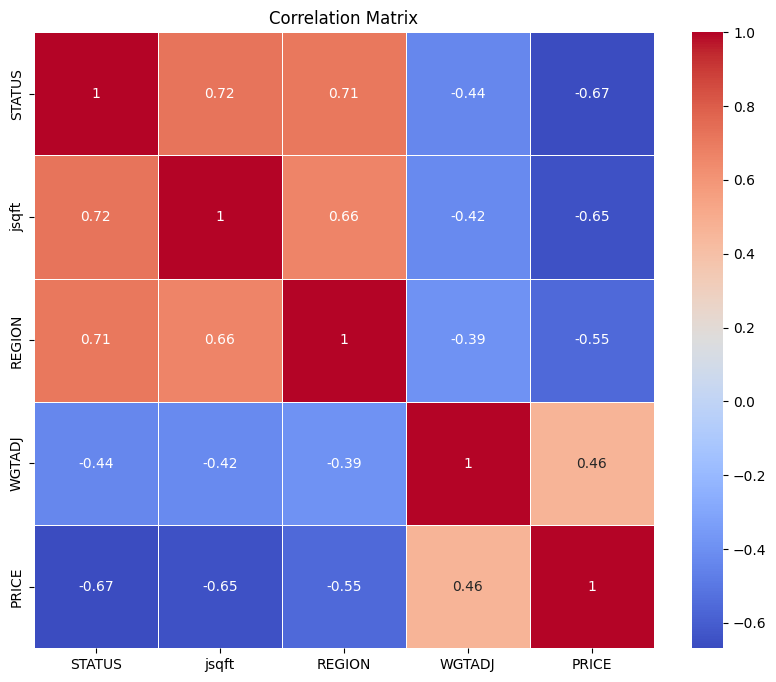

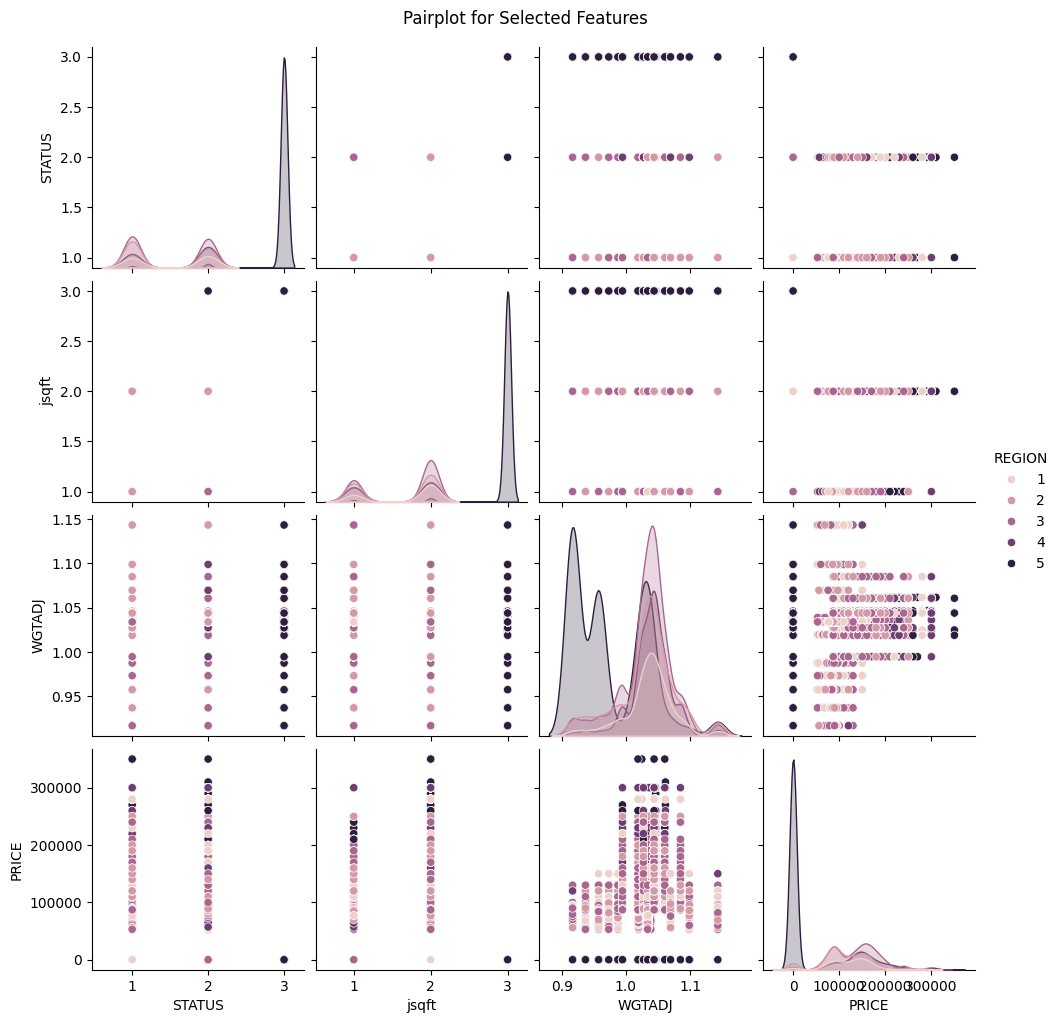

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Select the relevant columns
selected_columns = ['STATUS', 'jsqft', 'REGION', 'WGTADJ', 'PRICE']

# Create a DataFrame with only the selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
sns.pairplot(selected_df, height=2.5, hue='REGION')
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()


Summary Statistics:
            STATUS        jsqft       REGION       WGTADJ          PRICE
count  7023.000000  7023.000000  7023.000000  7023.000000    7023.000000
mean      1.987755     2.075893     3.426029     1.014395   88506.145807
std       0.813142     0.753474     1.370610     0.054619   76820.039710
min       1.000000     1.000000     1.000000     0.916800       9.000000
25%       1.000000     2.000000     2.000000     0.957400       9.000000
50%       2.000000     2.000000     3.000000     1.027300   92000.000000
75%       3.000000     3.000000     5.000000     1.046000  150000.000000
max       3.000000     3.000000     5.000000     1.143300  350000.000000


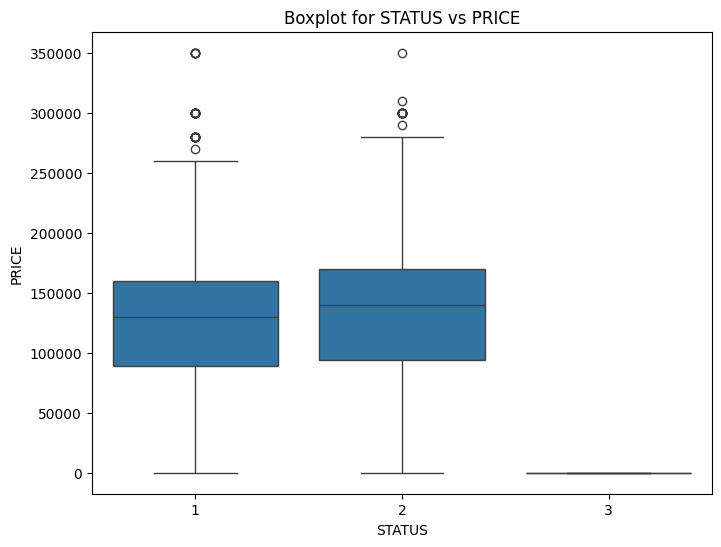

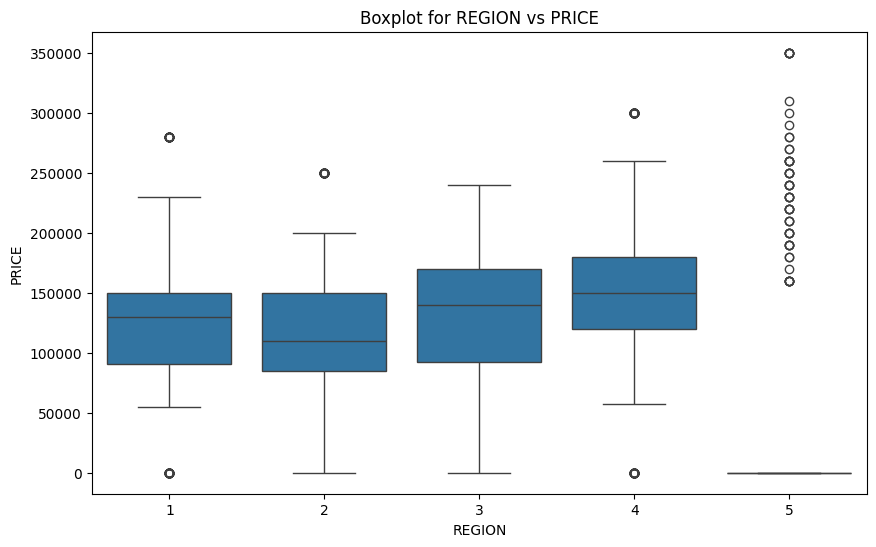

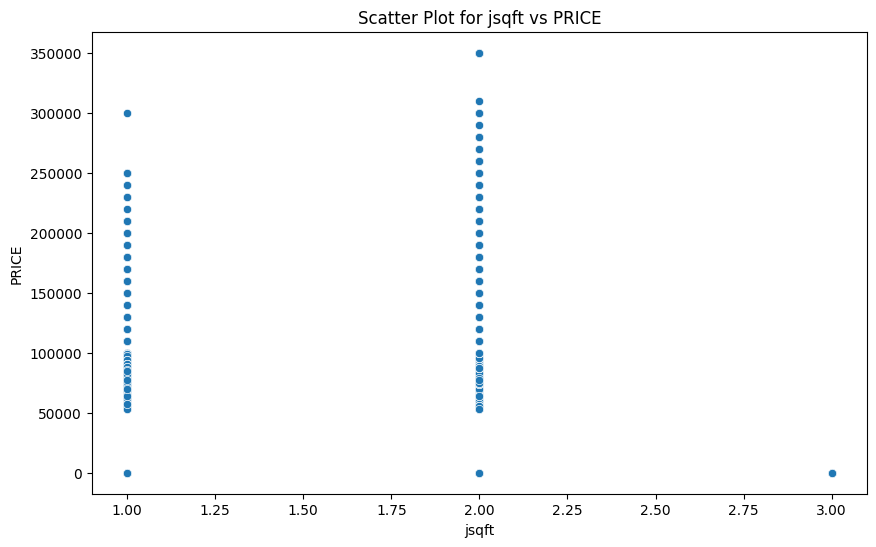

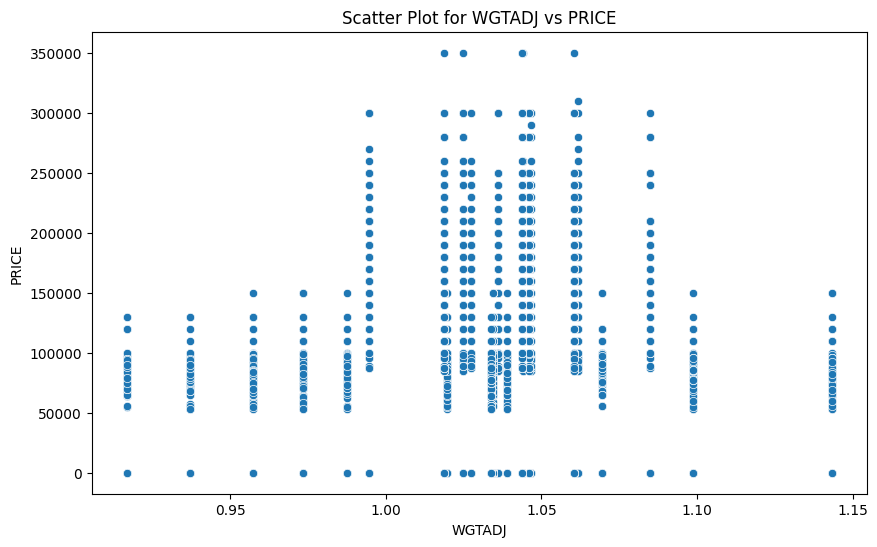

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Select the relevant columns
selected_columns = ['STATUS', 'jsqft', 'REGION', 'WGTADJ', 'PRICE']

# Create a DataFrame with only the selected columns
selected_df = df[selected_columns]

# Calculate summary statistics for each feature
summary_statistics = selected_df.describe()

# Display the summary statistics
print("Summary Statistics:")
print(summary_statistics)

# Boxplot for STATUS
plt.figure(figsize=(8, 6))
sns.boxplot(x='STATUS', y='PRICE', data=selected_df)
plt.title('Boxplot for STATUS vs PRICE')
plt.show()

# Boxplot for REGION
plt.figure(figsize=(10, 6))
sns.boxplot(x='REGION', y='PRICE', data=selected_df)
plt.title('Boxplot for REGION vs PRICE')
plt.show()

# Scatter plot for jsqft vs PRICE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='jsqft', y='PRICE', data=selected_df)
plt.title('Scatter Plot for jsqft vs PRICE')
plt.show()

# Scatter plot for WGTADJ vs PRICE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WGTADJ', y='PRICE', data=selected_df)
plt.title('Scatter Plot for WGTADJ vs PRICE')
plt.show()


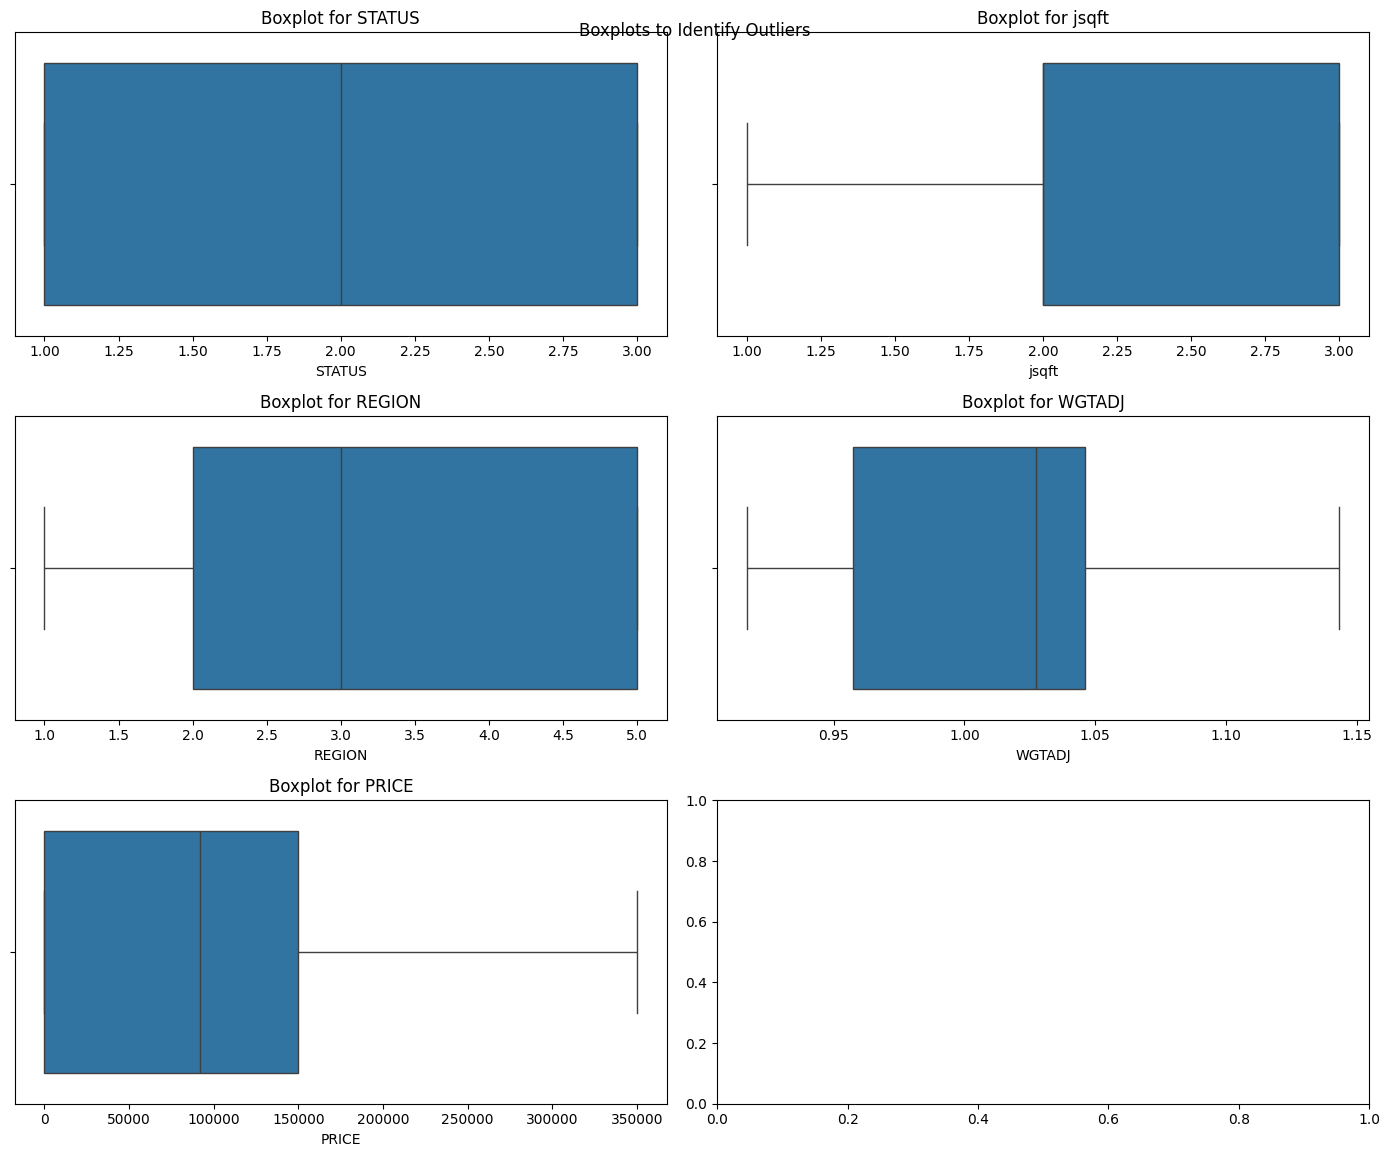

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Select the relevant columns
selected_columns = ['STATUS', 'jsqft', 'REGION', 'WGTADJ', 'PRICE']

# Create a DataFrame with only the selected columns
selected_df = df[selected_columns]

# Set up subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Boxplots to Identify Outliers', y=0.95)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each feature and create a boxplot
for i, feature in enumerate(selected_columns):
    sns.boxplot(x=selected_df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()


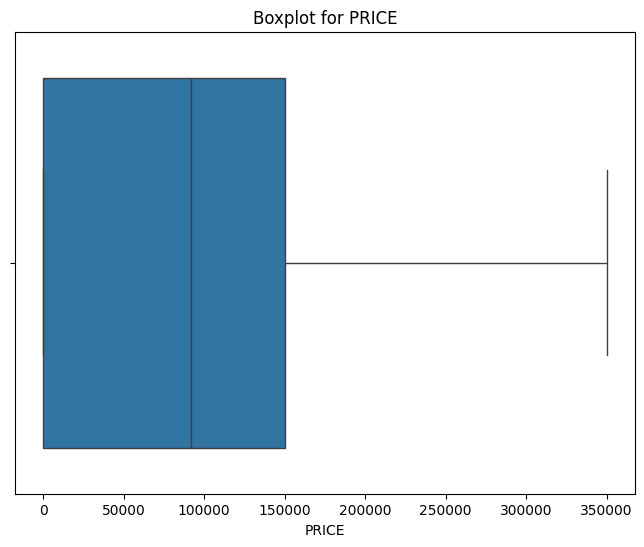

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')


# Boxplot for the target variable (PRICE)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['PRICE'])
plt.title('Boxplot for PRICE')
plt.show()


In [31]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('project step 1.csv')

# Drop rows with null values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Save the DataFrame to a new CSV file
df.to_csv('project_step_2.csv', index=False)

print("Dataframe saved to 'project step 2.csv'")


Dataframe saved to 'project step 2.csv'


In [32]:
# Read the CSV file into a DataFrame
df = pd.read_csv('project step 2.csv')

In [33]:
df.isnull()

,WEIGHT,STATUS,FINALDEST,FOOTINGS,LEASE,LOCATION,REGION,PIERS,SECURED,TITLED,...,jprice,jsqft,jbedroom,jlease,jfinaldest,jtitle,jsecured,jlocation,jfootings,jpiers
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7019,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7021,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
